In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

Clean The Data

In [2]:
movies_csv = pd.read_csv("movies.csv") 
df = pd.DataFrame(movies_csv)
df_orig = df
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
# Drop duplicated data
df = df.drop_duplicates()
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,(2022– ),"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [4]:
# Replace all values that are not numbers
df['YEAR'] = df['YEAR'].str.replace('[^0-9]', '', regex=True)

# Convert all numbers to strings
df['YEAR'] = df['YEAR'].apply(lambda x: str(x))

df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,20102022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [5]:
# Add a "-" if movie is multiple years
df['YEAR'] = df['YEAR'].apply(lambda x: f"{x[:4]}-{x[4:]}" if len(x) > 4 else x)
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,2010-2022,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"\nDrama, Thriller",NaN,\nAdd a Plot\n,\n Director:\nNicolai Rohde\n| \n Stars:...,NaN,NaN,NaN
9995,Arcane,2021,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,2022,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,2021,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [6]:
# Remove \n's and replace them with an empty space
df['GENRE'] = df['GENRE'].str.replace('\n', ' ')
df['ONE-LINE'] = df['ONE-LINE'].str.replace('\n', ' ')
df['STARS'] = df['STARS'].str.replace('\n', ' ')

df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,NaN
2,The Walking Dead,2010-2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...","885,805",44.0,NaN
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...","414,849",23.0,NaN
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of t...",Director: Matthias Schweighöfer | St...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",NaN,Add a Plot,Director: Nicolai Rohde | Stars: Fel...,NaN,NaN,NaN
9995,Arcane,2021,"Animation, Action, Adventure",NaN,Add a Plot,,NaN,NaN,NaN
9996,Heart of Invictus,2022,"Documentary, Sport",NaN,Add a Plot,Director: Orlando von Einsiedel | St...,NaN,NaN,NaN
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",NaN,Add a Plot,Director: Jovanka Vuckovic | Stars: ...,NaN,NaN,NaN


In [7]:
# Remove all NaN values
df = df.fillna('')
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced i...,Director: Peter Thorwarth | Stars: P...,"21,062",121.0,
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may ...,"Stars: Chris Wood, Sarah Mi...","17,870",25.0,
2,The Walking Dead,2010-2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a co...,"Stars: Andrew Lincoln, Norm...","885,805",44.0,
3,Rick and Morty,2013,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits ...,"Stars: Justin Roiland, Chri...","414,849",23.0,
4,Army of Thieves,2021,"Action, Crime, Horror",,"A prequel, set before the events of Army of t...",Director: Matthias Schweighöfer | St...,,,
...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,"Drama, Thriller",,Add a Plot,Director: Nicolai Rohde | Stars: Fel...,,,
9995,Arcane,2021,"Animation, Action, Adventure",,Add a Plot,,,,
9996,Heart of Invictus,2022,"Documentary, Sport",,Add a Plot,Director: Orlando von Einsiedel | St...,,,
9997,The Imperfects,2021,"Adventure, Drama, Fantasy",,Add a Plot,Director: Jovanka Vuckovic | Stars: ...,,,


Analyze Data

Use Bayesian average to figure out which movie is considered the "Best" based on votes and ratings

In [8]:
# Convert Votes and Rating to numeric
df['VOTES'] = pd.to_numeric(df['VOTES'], errors='coerce')
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Drop duplicates again and NaN values
df['MOVIES'] = df['MOVIES'].drop_duplicates()
df['MOVIES'] = df['MOVIES'].dropna()

# Mean across movies
C = df['RATING'].mean()

# Set lowest rating we will consider
m = df['VOTES'].quantile(.6)

# Compute weighted rating
def weighted_rating(x, m=m, C=C):
    v = x['VOTES']
    r = x["RATING"]
    return (v * r + m * C) / (v + m)

# Apply weighted rating
df['WEIGHTED_RATING'] = df.apply(weighted_rating, axis=1)

# Sort weighted rating
df = df.sort_values(by='WEIGHTED_RATING', ascending=False)

#Display top 3 movies
print(df[['MOVIES', 'WEIGHTED_RATING']].head(3))

    

     MOVIES  WEIGHTED_RATING
7870    NaN         8.864000
8634    NaN         8.784693
8538    NaN         8.706729


Display Most Used Genres

In [9]:
#Split genres
genre_lists = df['GENRE'].str.split(',').apply(lambda x: [genre.strip() for genre in x])
all_genres = list(chain.from_iterable(genre_lists))

# Count genre amounts
genre_count = pd.Series(all_genres).value_counts().head(10)

print("    " + 'Genre Amount:' + '\n')
print(genre_count)

    Genre Amount:

Drama          4115
Comedy         2736
Action         2110
Adventure      1588
Animation      1584
Crime          1519
Documentary    1221
Thriller        895
Mystery         840
Romance         835
dtype: int64


Display top 10 genres with a pie chart

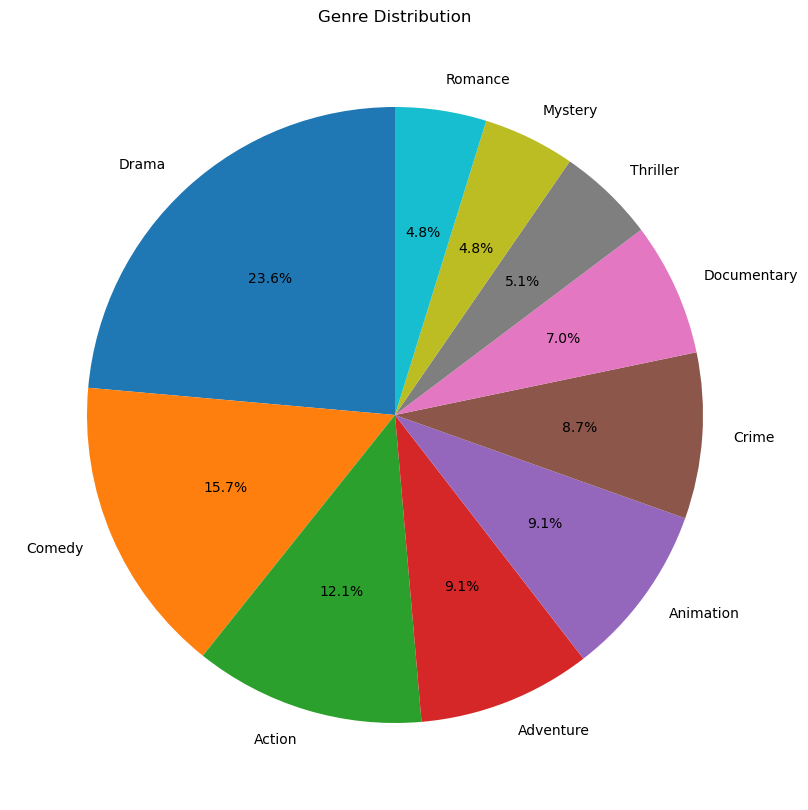

In [10]:
plt.figure(figsize=(10, 10))
plt.pie(genre_count, labels=genre_count.index, autopct='%1.1f%%', startangle=90)

plt.title('Genre Distribution')
plt.xticks(rotation=90)

plt.show()


In [11]:
#df['DIRECTOR'] = df['STARS'].str.split('|')
#df['DIRECTOR']
#df